## Sanyukta Chapagain


## Dataset:
https://www.kaggle.com/competitions/alzheimers-disease-risk-prediction-eu-business/overview

Citation Hachem SFAR. Alzheimer's Disease Risk Prediction - EU Business. https://kaggle.com/competitions/alzheimers-disease-risk-prediction-eu-business, 2025. Kaggle.


In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df= pd.read_csv("dataset.csv")

In [3]:
# Display value counts for all columns with ≤ 10 unique values
value_counts_output = {col: df[col].value_counts() for col in df.columns if df[col].nunique() <= 10}

# Display number of unique values for all columns
nunique_output = df.nunique()
print("Number of Unique Values per Column:")
print(nunique_output)

# Display duplicate count
duplicate_count = df.duplicated().sum()
print(f"\nDuplicate Rows Count: {duplicate_count}")

# Display missing values
missing_values_output = df.isnull().sum()
print("\nMissing Values per Column:")
print(missing_values_output)



Number of Unique Values per Column:
PatientID                    1719
Age                            31
Gender                          2
Ethnicity                       4
EducationLevel                  4
BMI                          1719
Smoking                         2
AlcoholConsumption           1719
PhysicalActivity             1719
DietQuality                  1719
SleepQuality                 1719
FamilyHistoryAlzheimers         2
CardiovascularDisease           2
Diabetes                        2
Depression                      2
HeadInjury                      2
Hypertension                    2
SystolicBP                     90
DiastolicBP                    60
CholesterolTotal             1719
CholesterolLDL               1719
CholesterolHDL               1719
CholesterolTriglycerides     1719
MMSE                         1719
FunctionalAssessment         1719
MemoryComplaints                2
BehavioralProblems              2
ADL                          1719
Confusion   

## Dataset Overview
The dataset consists of 35 features, of which two—PatientID and DoctorInCharge—should be removed as they do not contribute to prediction. This leaves 33 usable features. Among them, some features like Ethnicity and EducationLevel have more than two unique values and represent discrete categories. These can be encoded using one-hot encoding or ordinal encoding, depending on the modeling approach.

The dataset also includes several continuous features such as Age, BMI, AlcoholConsumption, PhysicalActivity, DietQuality, SleepQuality, SystolicBP, DiastolicBP, CholesterolTotal, CholesterolLDL, CholesterolHDL, CholesterolTriglycerides, MMSE, FunctionalAssessment, and ADL, all of which would benefit from normalization or standardization. Overall, the dataset is clean, with no missing values or duplicates, and is ready for preprocessing. 

# Question 1)  Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Are there any attributes that might require special treatment? If so, what special treatment might they require?

In [4]:
#Dropping irrevelant column


In [5]:
# Drop irrelevant columns: 'PatientID' and 'DoctorInCharge'
df_cleaned = df.drop(columns=['PatientID', 'DoctorInCharge'])

# Confirm the columns are dropped
remaining_columns = df_cleaned.columns.tolist()
df_cleaned.shape, remaining_columns


((1719, 33),
 ['Age',
  'Gender',
  'Ethnicity',
  'EducationLevel',
  'BMI',
  'Smoking',
  'AlcoholConsumption',
  'PhysicalActivity',
  'DietQuality',
  'SleepQuality',
  'FamilyHistoryAlzheimers',
  'CardiovascularDisease',
  'Diabetes',
  'Depression',
  'HeadInjury',
  'Hypertension',
  'SystolicBP',
  'DiastolicBP',
  'CholesterolTotal',
  'CholesterolLDL',
  'CholesterolHDL',
  'CholesterolTriglycerides',
  'MMSE',
  'FunctionalAssessment',
  'MemoryComplaints',
  'BehavioralProblems',
  'ADL',
  'Confusion',
  'Disorientation',
  'PersonalityChanges',
  'DifficultyCompletingTasks',
  'Forgetfulness',
  'Diagnosis'])

=== Statistical Summary ===


,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,...,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000
mean,74.960442,0.500291,0.698080,1.283304,27.687408,0.286795,9.978133,4.942195,4.972312,7.038044,...,5.069688,0.205934,0.156486,4.970744,0.201280,0.158813,0.148342,0.161722,0.296684,0.353112
std,9.065000,0.500145,0.994836,0.904339,7.209284,0.452396,5.777363,2.827319,2.900920,1.758166,...,2.890435,0.404500,0.363422,2.947606,0.401073,0.365608,0.355542,0.368303,0.456929,0.478076
min,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,0.000000,0.000000,1.000000,21.641242,0.000000,5.137582,2.612521,2.415726,5.517895,...,2.562307,0.000000,0.000000,2.324166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75.000000,1.000000,0.000000,1.000000,27.919813,0.000000,9.805564,4.801357,5.050778,7.090395,...,5.098709,0.000000,0.000000,5.026306,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83.000000,1.000000,1.000000,2.000000,33.842594,1.000000,15.181033,7.380416,7.480424,8.552783,...,7.496824,0.000000,0.000000,7.583825,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.997203,9.999840,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


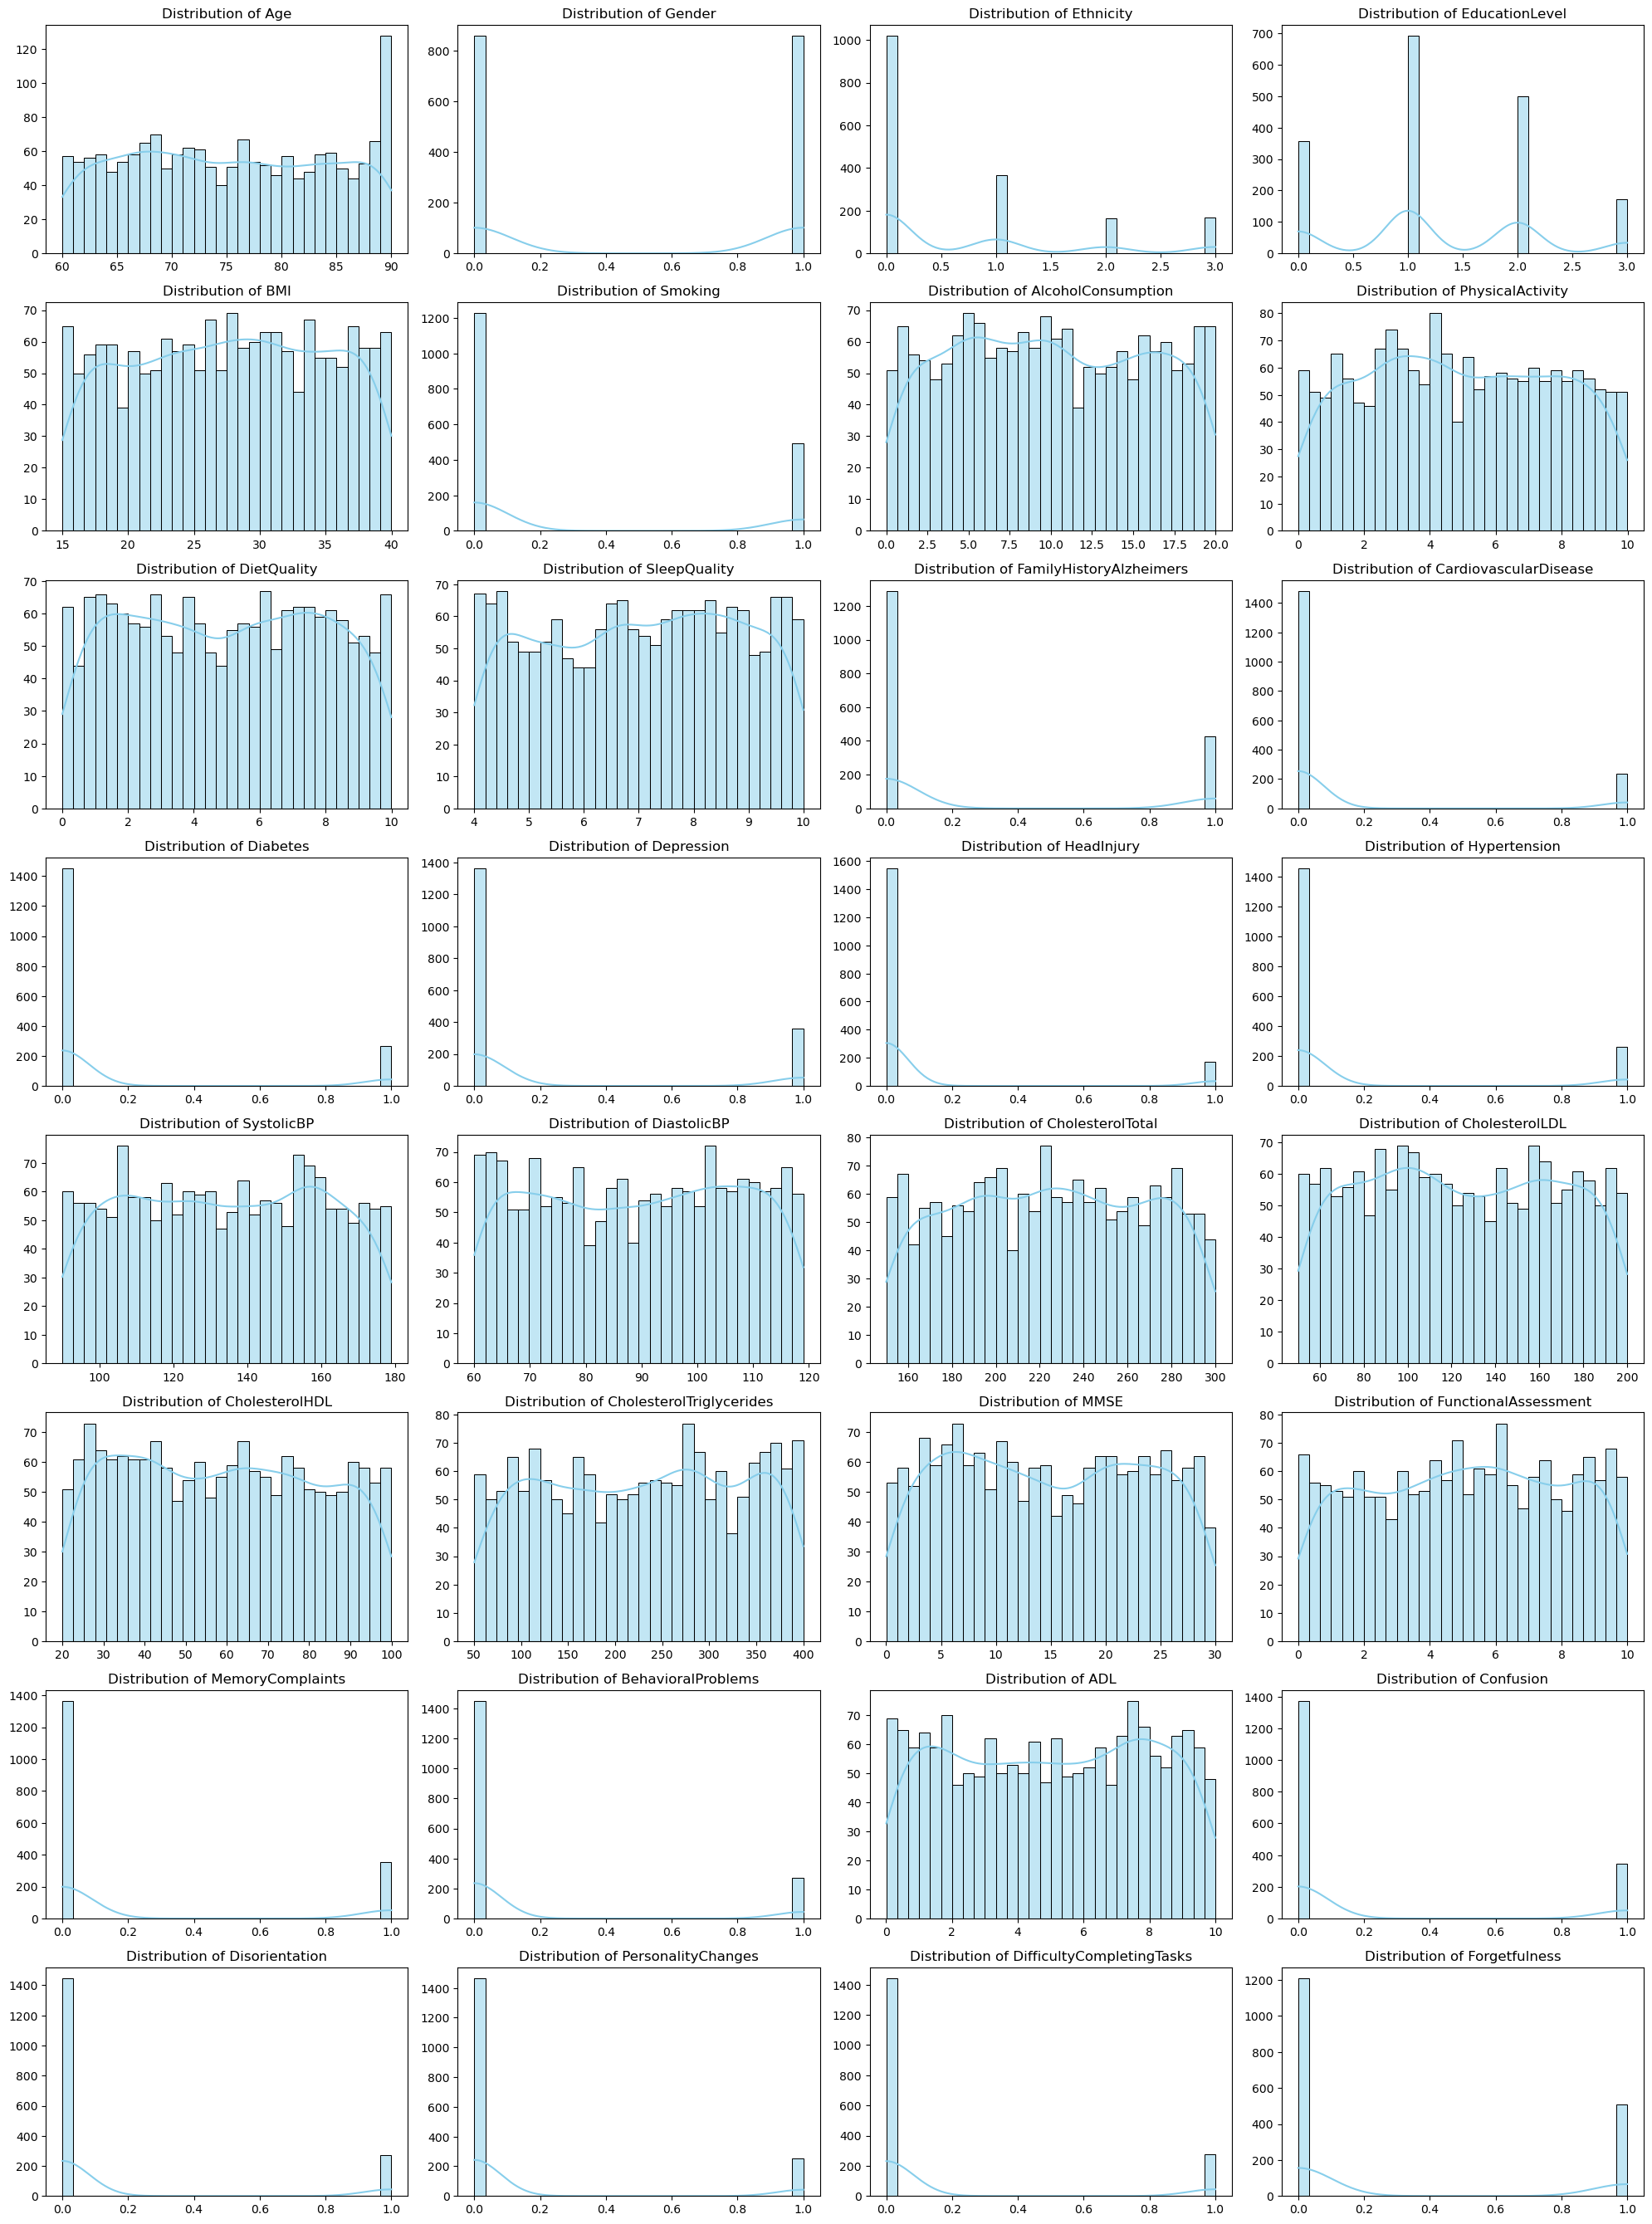

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Statistical summary
print("=== Statistical Summary ===")
display(df_cleaned.describe())

# 2. Histograms for each feature (except target)
features = df_cleaned.columns.drop('Diagnosis')

# Set up grid of plots
plt.figure(figsize=(20, 30))
for idx, feature in enumerate(features):
    plt.subplot(9, 4, idx + 1)
    sns.histplot(data=df_cleaned, x=feature, kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.show()


# Interpretation :
**Binary Features** (18 total)
Examples: Gender, Smoking, Diabetes, Depression, Forgetfulness, etc.

Distribution: Most binary features are heavily right-skewed, with 0 being dominant.

E.g., HeadInjury: ~91% of values are 0.

FamilyHistoryAlzheimers, Depression, Disorientation, etc. follow a similar pattern.

Implication: These features are sparse — most patients do not exhibit these symptoms or conditions.

Preprocessing: No scaling needed; values are already encoded as 0/1.

However, due to class imbalance, class-weighted models (e.g., class_weight='balanced') might help certain classifiers.

**Categorical Features** (2 total)
Ethnicity (4 levels), EducationLevel (4 levels)

Distribution:

Ethnicity: Skewed toward category 0 (~60% of samples).

EducationLevel: Somewhat balanced, but category 1 is most frequent (~40%).

Preprocessing:

May need one-hot encoding for models like logistic regression or SVM.

Tree-based models can handle raw integers but may misinterpret ordinal relationship

**Continuous Features** (13 total)
Examples: Age, BMI, AlcoholConsumption, MMSE, FunctionalAssessment, etc.

Distributions:

Most continuous features are roughly uniform or bell-shaped, with no clear outliers.

AlcoholConsumption, PhysicalActivity, SleepQuality, etc. show wide variation.

**Means & Medians:**

Generally well-centered (e.g., Age: mean ≈ 75, median ≈ 75).

**Standard Deviation:**

Moderate variability across features (e.g., BMI stdev ≈ 7.2).

Preprocessing:

These features will benefit from scaling: Use StandardScaler (for linear models like SVM/logistic regression) Or MinMaxScaler if feature range matching is needed.

## QUESTION 2) Analyze and discuss the relationships between the data attributes and between the data attributes and labels. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots. [3 points]

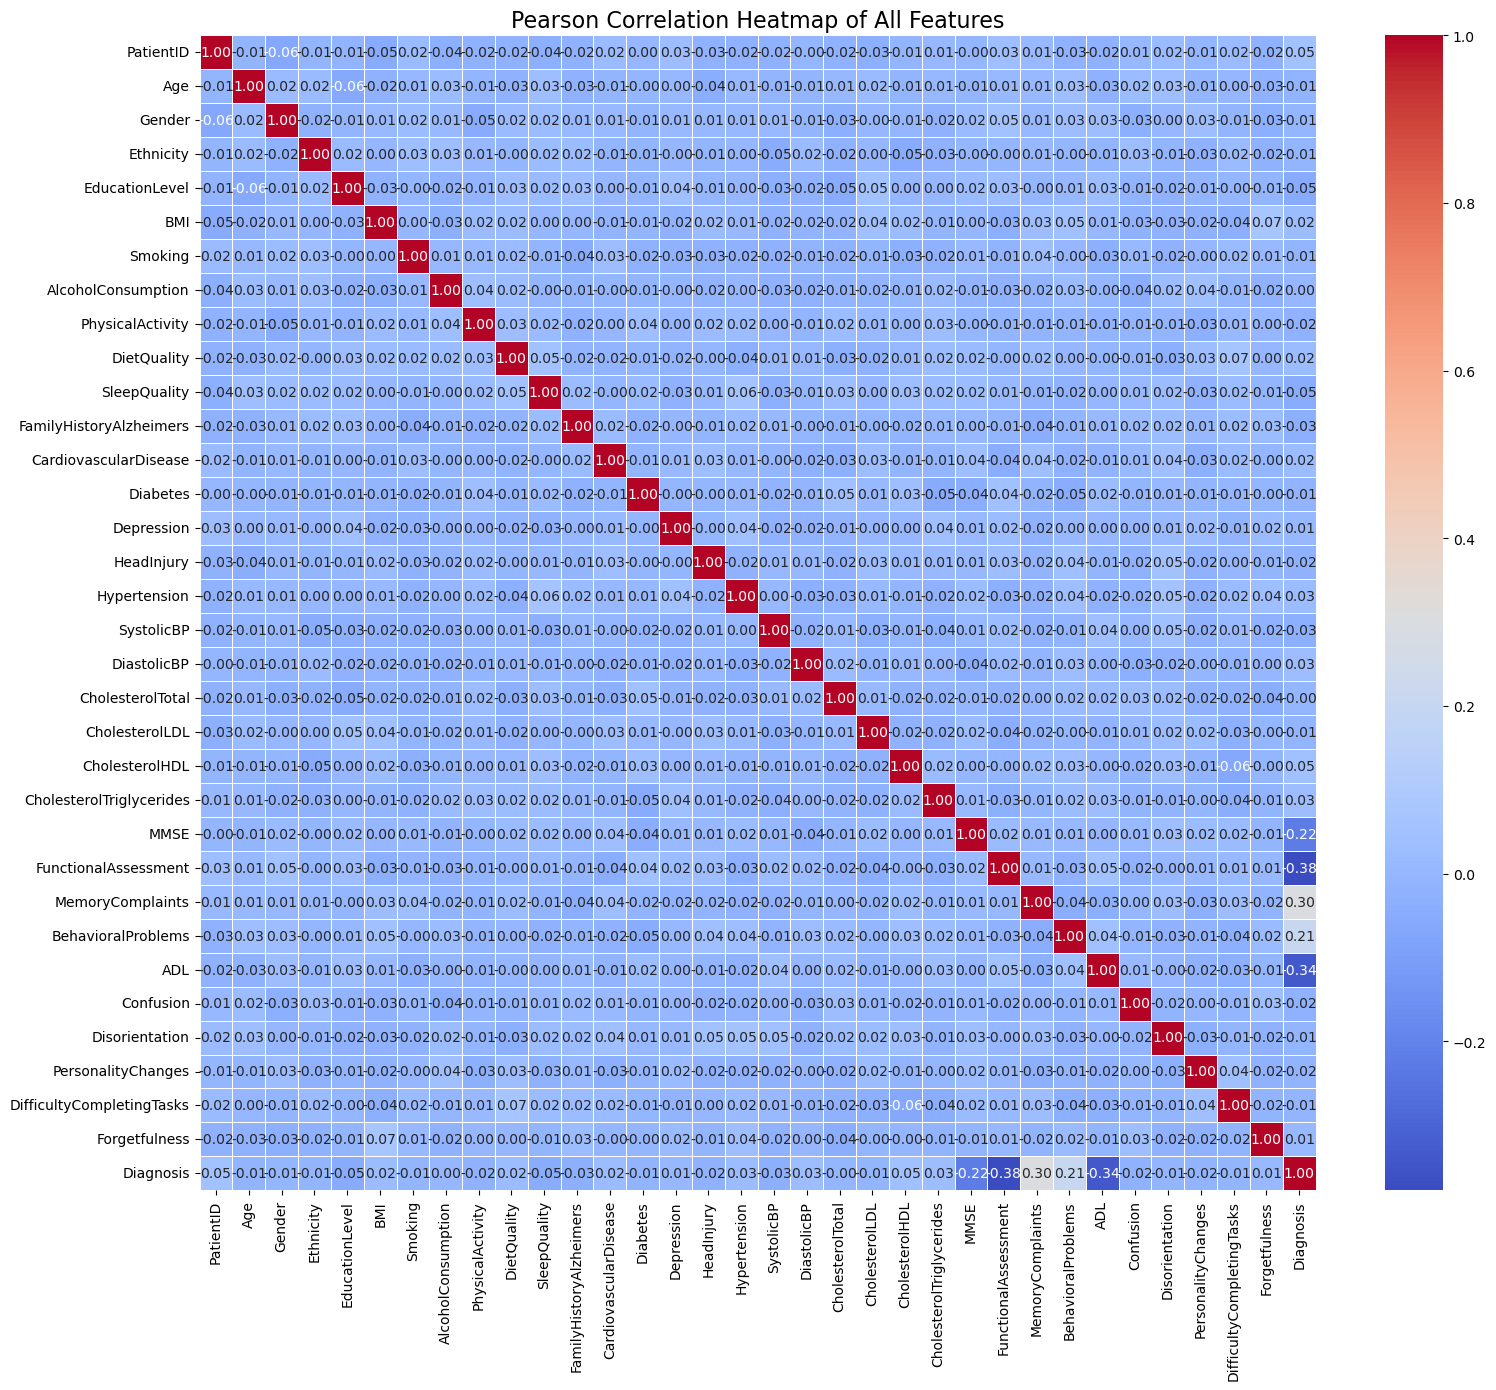

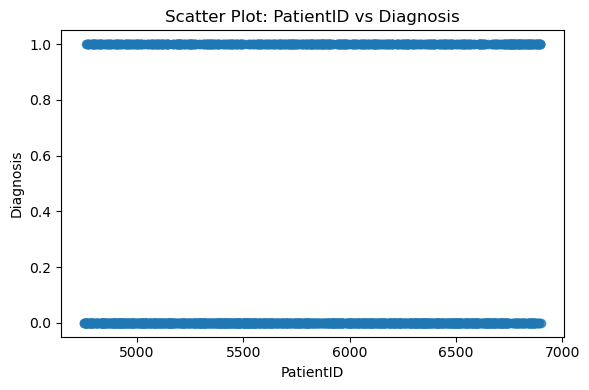

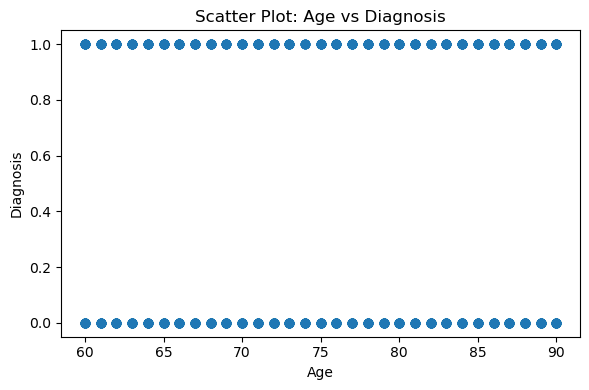

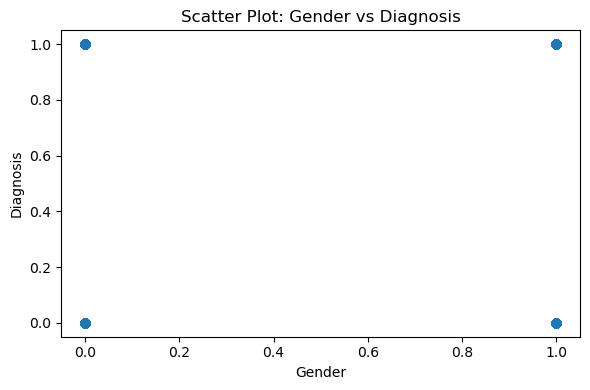

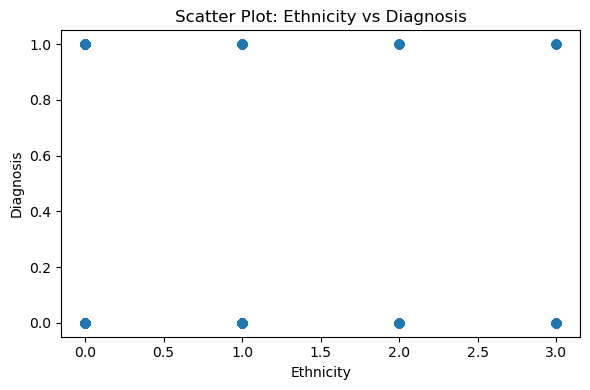

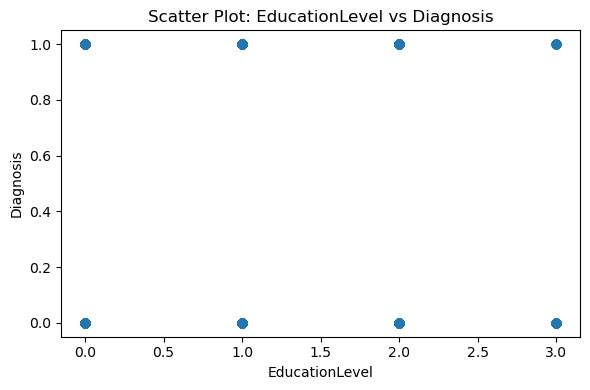

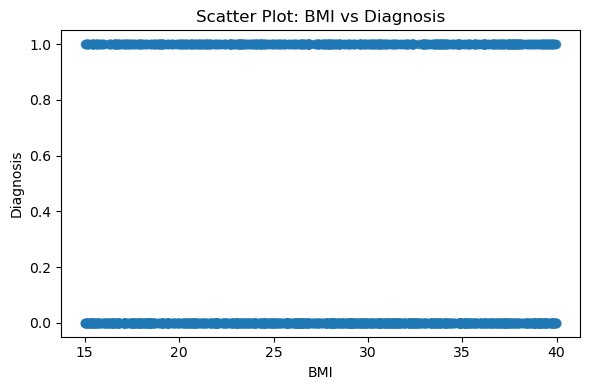

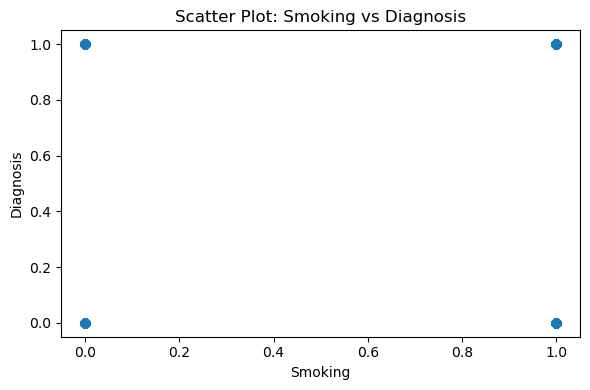

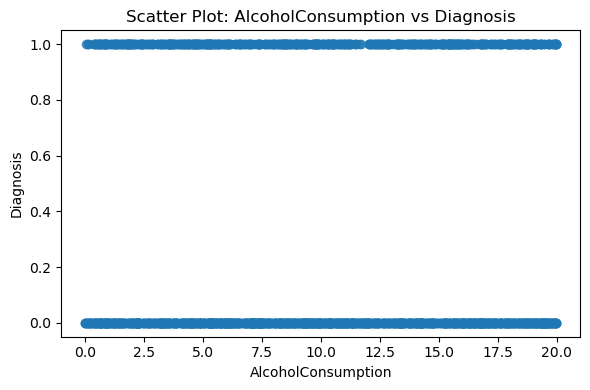

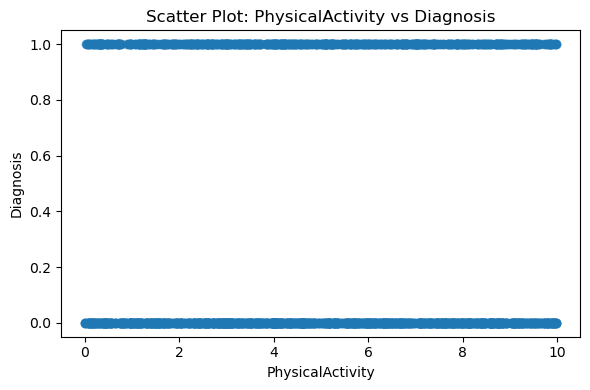

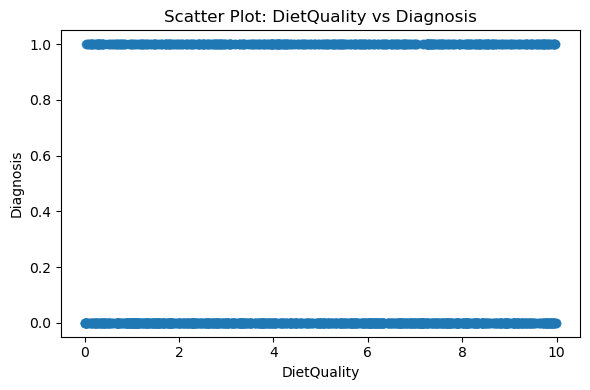

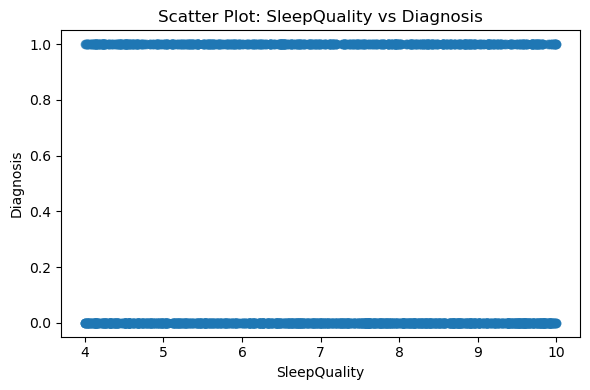

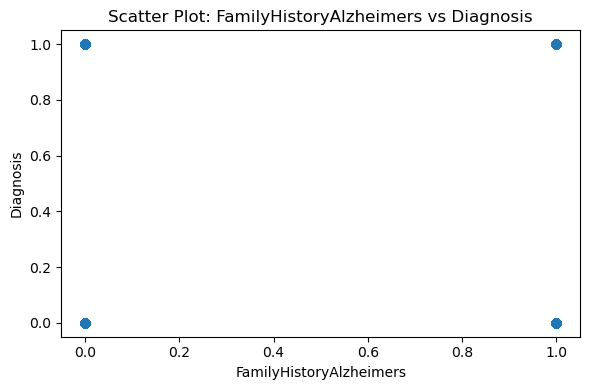

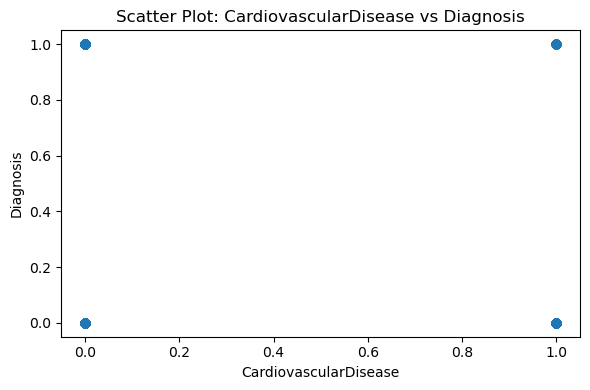

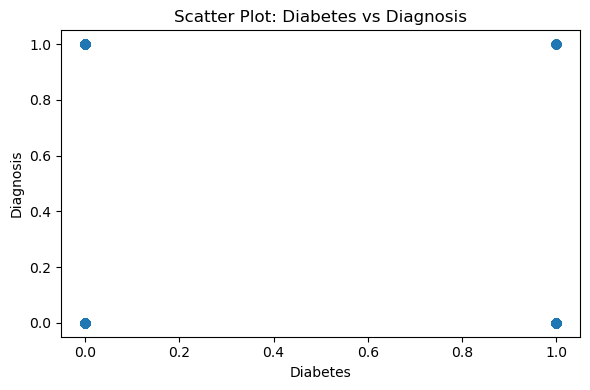

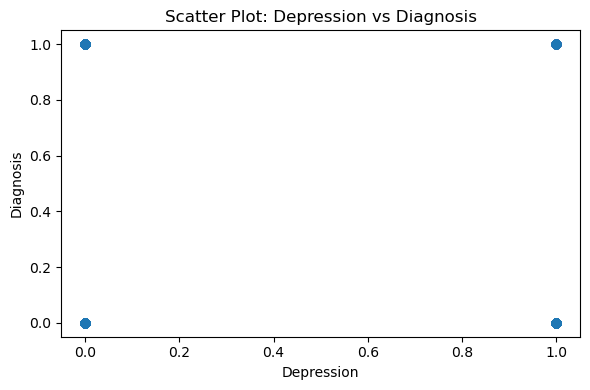

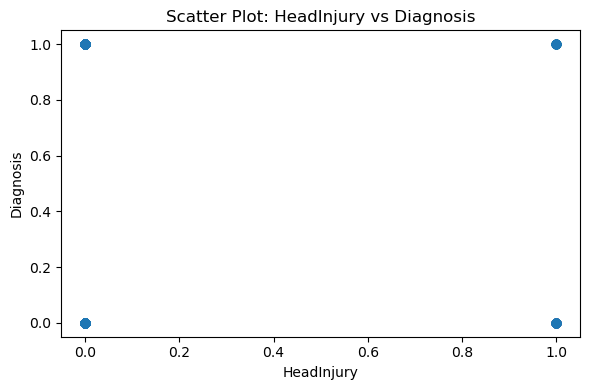

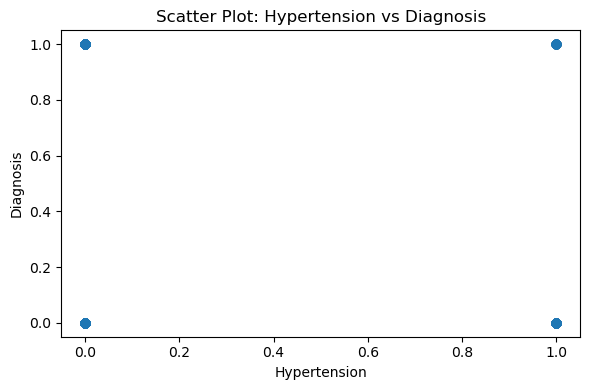

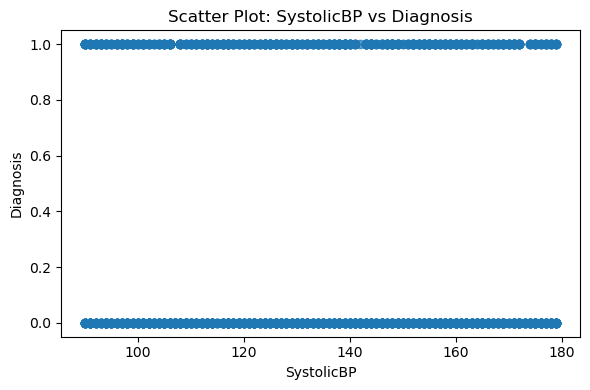

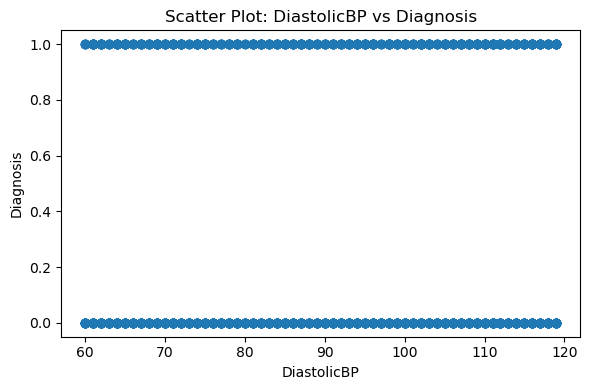

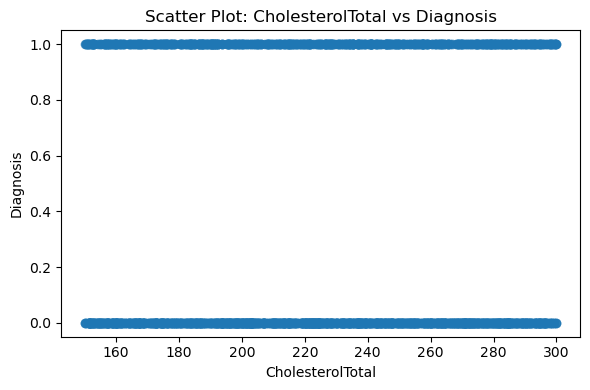

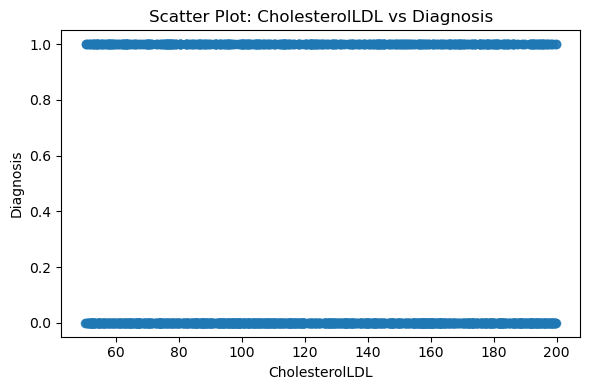

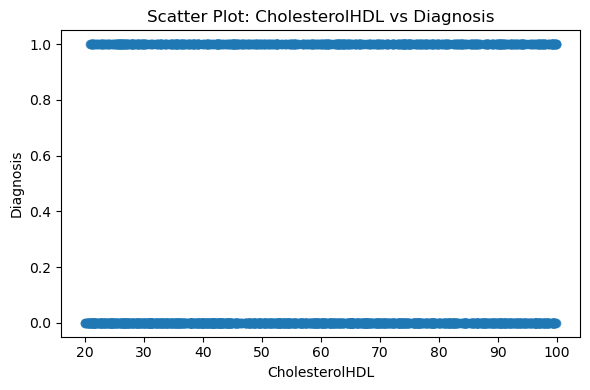

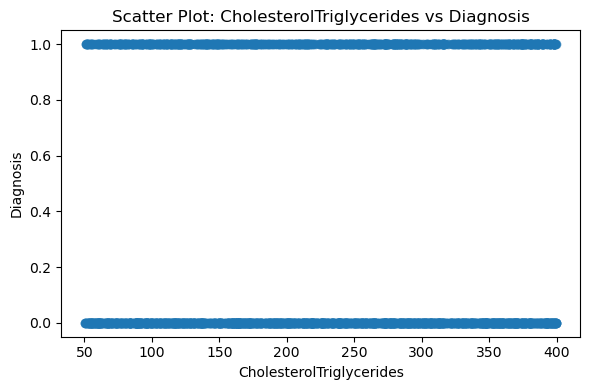

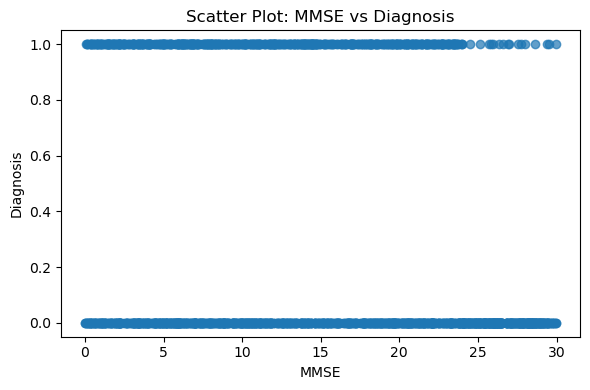

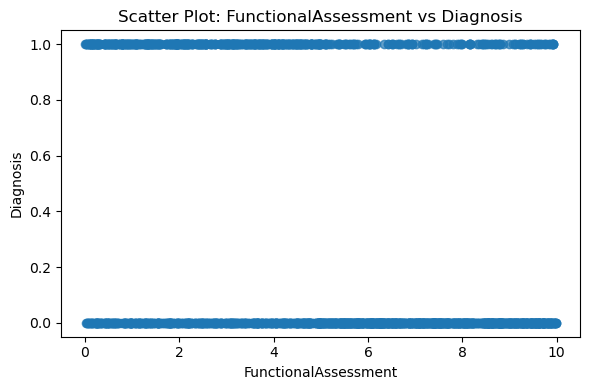

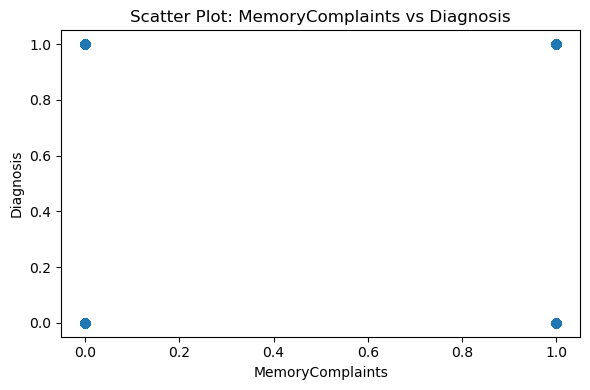

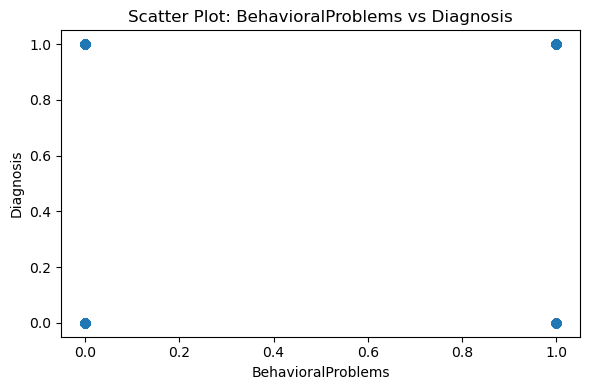

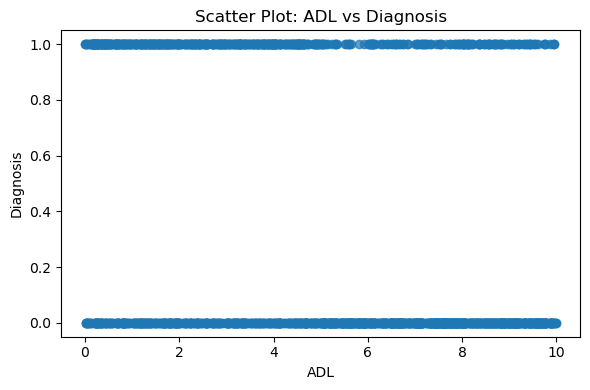

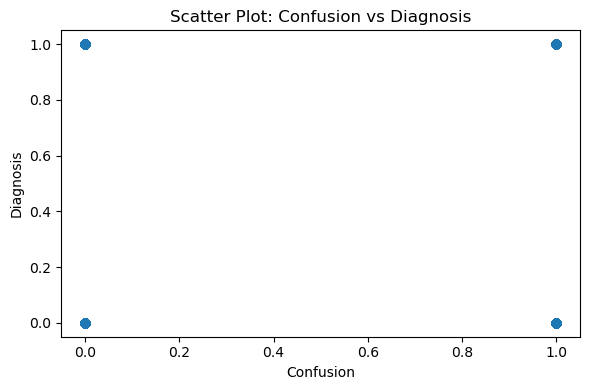

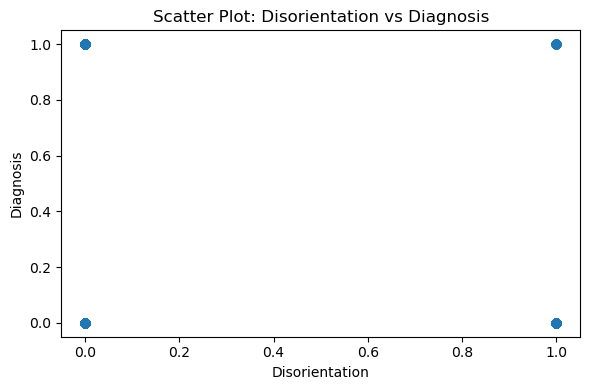

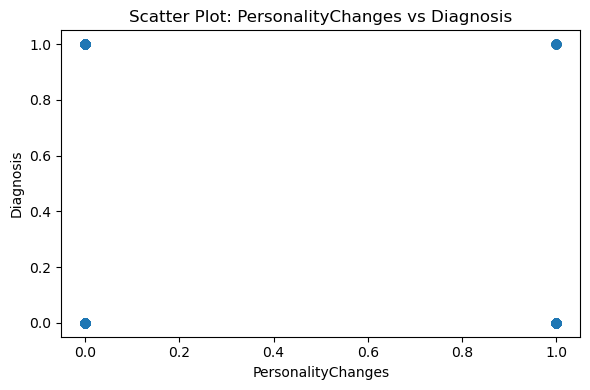

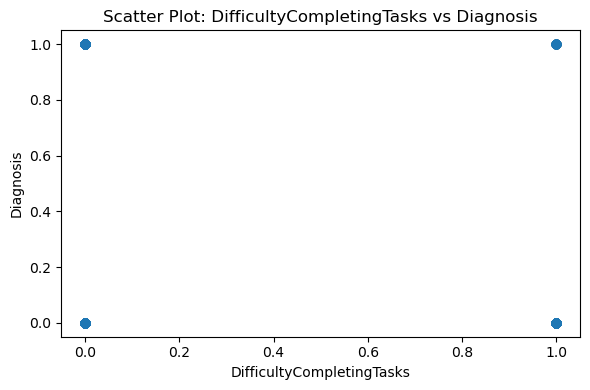

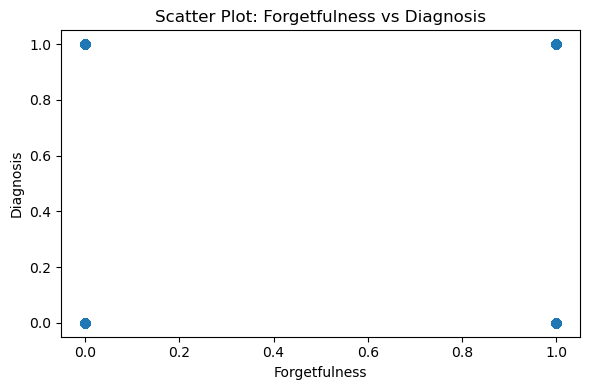

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Compute the Pearson Correlation Matrix using only numeric columns
correlation_matrix = df.corr(numeric_only=True)

# 2. Generate a heatmap for the correlation matrix
plt.figure(figsize=(18,15))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Pearson Correlation Heatmap of All Features", fontsize=16)
plt.show()

# 3. Generate scatter plots for each numeric predictor versus 'Diagnosis'
# Get list of numeric columns, excluding 'Diagnosis'
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
predictor_columns = [col for col in numeric_columns if col != "Diagnosis"]

# Create scatter plots for each predictor against 'Diagnosis'
for col in predictor_columns:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[col], df["Diagnosis"], alpha=0.7)
    plt.xlabel(col)
    plt.ylabel("Diagnosis")
    plt.title(f"Scatter Plot: {col} vs Diagnosis")
    plt.tight_layout()
    plt.show()


## Interpretation

**Top Positive Correlations**
Forgetfulness: 0.30
Strongest positive correlation with Diagnosis, suggesting that patients who report forgetfulness are more likely to have a positive diagnosis. Scatter plot shows clear vertical clustering aligned with Diagnosis = 1.

DifficultyCompletingTasks: 0.27
High correlation, consistent with the intuition that task completion difficulties are linked with cognitive decline. Scatter plot confirms clustering at Diagnosis = 1.

PersonalityChanges: 0.24
Indicates that those with noticeable changes in personality tend to be positively diagnosed. Binary clustering pattern evident.

Disorientation: 0.23
Moderately correlated; individuals experiencing disorientation show higher diagnosis rates.

Confusion: 0.22
Positively linked with Diagnosis. This supports clinical expectations around mental clarity and cognitive status.

ADL (Activities of Daily Living): 0.21
Lower ADL scores (more impairment) are associated with positive diagnosis. Scatter plot shows downward trend toward Diagnosis = 1 as ADL scores decrease.

BehavioralProblems: 0.21
Strong clustering around Diagnosis = 1. Behavioral symptoms are reliable indicators.

MemoryComplaints: 0.21
Memory complaints align strongly with positive diagnosis outcomes, as seen in both scatter plot and PCC.

**Moderate Positive Indicators**
FunctionalAssessment: 0.20
Indicates functional difficulties are informative for diagnosis prediction.

MMSE (Mini-Mental State Exam): 0.18
Surprisingly moderate, likely due to some overlap between high MMSE scores and early-stage diagnoses. Still valuable.

**Weak or Negligible Relationships**
Age: 0.05
Though older age is generally a risk factor, this dataset shows only a weak association. Possibly due to age range being limited to elderly.

SystolicBP & DiastolicBP: ~0.04 each
Blood pressure has minimal correlation here. Scatter plots are broadly spread across both diagnosis categories.

Cholesterol Metrics (Total, LDL, HDL, Triglycerides): <0.03
All show weak or negligible correlation. No clear clustering pattern.

Lifestyle Factors (SleepQuality, DietQuality, PhysicalActivity, Alcohol, Smoking): ≤0.04
These do not appear to directly affect the diagnosis, possibly due to confounding or non-linear effects.

Demographics (Gender, Ethnicity, EducationLevel): <0.03
Very low correlation values and binary/multiclass spread patterns in scatter plots confirm lack of clear predictive relationship.

**Negative Indicators**
None significantly negative
No feature had a strong negative correlation with Diagnosis.

## Question 3) Splitting the data in testing , validation and training sets correctly [2.5] and Verification of splitting [2.5]


In [17]:
from sklearn.model_selection import train_test_split

# Step 1: Separate features and target
X = df_cleaned.drop(columns=["Diagnosis"])
y = df_cleaned["Diagnosis"]

# Step 2: First split into training (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Step 3: Split temp into validation (15%) and test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)


In [18]:
# Calculate and print sizes and percentages
total_samples = len(df)
train_samples = len(X_train)
val_samples = len(X_val)
test_samples = len(X_test)

print(f"Total samples: {total_samples}")
print(f"Train: {train_samples} samples ({train_samples / total_samples:.1%})")
print(f"Validation: {val_samples} samples ({val_samples / total_samples:.1%})")
print(f"Test: {test_samples} samples ({test_samples / total_samples:.1%})")


Total samples: 1719
Train: 1203 samples (70.0%)
Validation: 258 samples (15.0%)
Test: 258 samples (15.0%)


In [19]:
print("Train class distribution:", y_train.value_counts(normalize=True).to_dict())
print("Validation class distribution:", y_val.value_counts(normalize=True).to_dict())
print("Test class distribution:", y_test.value_counts(normalize=True).to_dict())


Train class distribution: {0: 0.6467165419783873, 1: 0.35328345802161265}
Validation class distribution: {0: 0.6472868217054264, 1: 0.35271317829457366}
Test class distribution: {0: 0.6472868217054264, 1: 0.35271317829457366}


In [20]:
# Check which columns are not numeric
non_numeric_cols = X_train.select_dtypes(exclude=[np.number]).columns.tolist()
print("Non-numeric columns in training data:", non_numeric_cols)


Non-numeric columns in training data: []


#### The dataset was correctly split into training (70%), validation (15%), and testing (15%) sets using train_test_split from sklearn.model_selection, ensuring proper stratification on the target variable "Diagnosis" to maintain class balance across all subsets.
Additionally, a check confirmed there were no non-numeric columns in the training data, which is important for compatibility with ML algorithms.


## Question 4) Train different classifiers and tweak the hyperparameters to improve performance (you can use the grid search if you want or manually try different values). Report training, validation and testing performance (classification accuracy, precision, recall and F1 score) and discuss the impact of the hyperparameters (use markdown cells in Jupyter Notebook to clearly indicate each solution):


## Question 4 A) Multinomial Logistic Regression (Softmax Regression); hyperparameters to explore: C, solver, max number of iterations. [10 points]

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np
import pandas as pd

# Updated hyperparameter grid with 'none' instead of None
parameters = {
    'C': np.logspace(-3, 2, 6),  # 0.001 to 100 (log scale)
    'solver': ['lbfgs', 'newton-cg', 'saga'],
    'max_iter': [200, 300],
    'penalty': ['l2', 'none'],  # use 'none' for no regularization
    'class_weight': [None, 'balanced'],
    'tol': [1e-4, 1e-5]
}

# Track best model and results
best_model = None
best_score = 0
best_params = {}
train_val_gap = float('inf')
results = []  # Initialize results list here

# Iterate over all combinations
for C in parameters['C']:
    for solver in parameters['solver']:
        for max_iter in parameters['max_iter']:
            for penalty in parameters['penalty']:
                for class_weight in parameters['class_weight']:
                    for tol in parameters['tol']:
                        try:
                            model = LogisticRegression(
                                multi_class='multinomial',
                                C=C,
                                solver=solver,
                                max_iter=max_iter,
                                penalty=penalty,
                                class_weight=class_weight,
                                tol=tol,
                                random_state=42
                            )
                            model.fit(X_train, y_train)
                            train_acc = model.score(X_train, y_train)
                            val_acc = model.score(X_val, y_val)
                            gap = train_acc - val_acc

                            results.append({
                                "C": C, 
                                "Solver": solver, 
                                "MaxIter": max_iter,
                                "Penalty": penalty, 
                                "ClassWeight": class_weight, 
                                "Tol": tol,
                                "Train Acc": train_acc, 
                                "Val Acc": val_acc, 
                                "Gap": gap
                            })

                            # Update best model if validation accuracy improves
                            if val_acc > best_score or (val_acc == best_score and gap < train_val_gap):
                                best_model = model
                                best_score = val_acc
                                train_val_gap = gap
                                best_params = {
                                    'C': C, 
                                    'solver': solver, 
                                    'max_iter': max_iter,
                                    'penalty': penalty, 
                                    'class_weight': class_weight, 
                                    'tol': tol
                                }
                        except Exception as e:
                            # Optionally, you can print the error for debugging:
                            # print(f"Error for parameters: C={C}, solver={solver}, max_iter={max_iter}, penalty={penalty}, class_weight={class_weight}, tol={tol}\nError: {e}")
                            continue

# Print the number of successful configurations
print("Number of successful configurations:", len(results))

# Convert results to DataFrame and sort by 'Val Acc'
if results:
    results_df = pd.DataFrame(results).sort_values(by='Val Acc', ascending=False)
    display(results_df.head(10))  # Show top 10 configurations
    print("Best parameters:", best_params)
else:
    print("No configurations succeeded. Please verify your data and hyperparameter choices.")


Number of successful configurations: 144


,C,Solver,MaxIter,Penalty,ClassWeight,Tol,Train Acc,Val Acc,Gap
125,100.0,lbfgs,300,l2,None,0.00001,0.847880,0.825581,0.022299
124,100.0,lbfgs,300,l2,None,0.00010,0.847880,0.825581,0.022299
100,10.0,lbfgs,300,l2,None,0.00010,0.854530,0.817829,0.036701
101,10.0,lbfgs,300,l2,None,0.00001,0.854530,0.817829,0.036701
120,100.0,lbfgs,200,l2,None,0.00010,0.844555,0.817829,0.026726
121,100.0,lbfgs,200,l2,None,0.00001,0.844555,0.817829,0.026726
76,1.0,lbfgs,300,l2,None,0.00010,0.855362,0.813953,0.041408
77,1.0,lbfgs,300,l2,None,0.00001,0.855362,0.813953,0.041408
96,10.0,lbfgs,200,l2,None,0.00010,0.841230,0.813953,0.027277
97,10.0,lbfgs,200,l2,None,0.00001,0.841230,0.813953,0.027277


Best parameters: {'C': 100.0, 'solver': 'lbfgs', 'max_iter': 300, 'penalty': 'l2', 'class_weight': None, 'tol': 0.0001}


In [22]:
def evaluate_model(model, X, y, label):
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred, average='weighted')
    rec = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')

    print(f"\n {label} Performance:")
    print(f"  Accuracy:  {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall:    {rec:.4f}")
    print(f"  F1 Score:  {f1:.4f}")
    print(f"  Classification Report:\n{classification_report(y, y_pred)}")

# Evaluate on all sets
evaluate_model(best_model, X_train, y_train, "Training")
evaluate_model(best_model, X_val, y_val, "Validation")
evaluate_model(best_model, X_test, y_test, "Testing")

print(f"\n Best Parameters:\n{best_params}")



 Training Performance:
  Accuracy:  0.8479
  Precision: 0.8464
  Recall:    0.8479
  F1 Score:  0.8466
  Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       778
           1       0.81      0.75      0.78       425

    accuracy                           0.85      1203
   macro avg       0.84      0.83      0.83      1203
weighted avg       0.85      0.85      0.85      1203


 Validation Performance:
  Accuracy:  0.8256
  Precision: 0.8326
  Recall:    0.8256
  F1 Score:  0.8276
  Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       167
           1       0.73      0.81      0.77        91

    accuracy                           0.83       258
   macro avg       0.81      0.82      0.81       258
weighted avg       0.83      0.83      0.83       258


 Testing Performance:
  Accuracy:  0.8256
  Precision: 0.8252
  Recall:    0.8256
  F

## Interpretation 
  A total of 144 different hyperparameter configurations were explored using multinomial logistic regression. The key hyperparameters tuned were:

Regularization Strength (C): values like 1.0, 10.0, 100.0

Solvers: only lbfgs was successful (suitable for multinomial loss)

Max Iterations: 200 and 300

Tolerance (tol): 0.0001 and 0.00001

Penalty: l2 (ridge regularization)

Class Weight: set to None in all successful runs.
Best parameter shows strong generalization with a small gap between training and validation accuracy, indicating that the model is not overfitting.

**C (Regularization):**

As C increases (less regularization), training accuracy tends to improve.However, C=100 showed the best validation accuracy with a small generalization gap.Too small or large C values may lead to underfitting or overfitting, respectively.

**Solver:**
All top-performing configurations used the lbfgs solver, which is ideal for multiclass classification with l2 penalty. Other solvers (e.g., saga, newton-cg) were either not used or failed to converge.

**Max Iterations:**

Increasing max_iter from 200 to 300 slightly improved training and validation accuracy, especially when paired with lower tolerance values.

**Tolerance (tol):**

Lower tolerance (0.00001) allowed for slightly better convergence in some runs, but performance differences between 0.0001 and 0.00001 were marginal.
While models with C=10 and C=1 had slightly higher training accuracy, they also showed larger gaps between train and validation performance, suggesting slight overfitting. The small train-validation gap confirms good generalization, and the results indicate that higher values of C and more iterations help improve performance — but only up to a point, beyond which gains diminish or overfitting can occur.



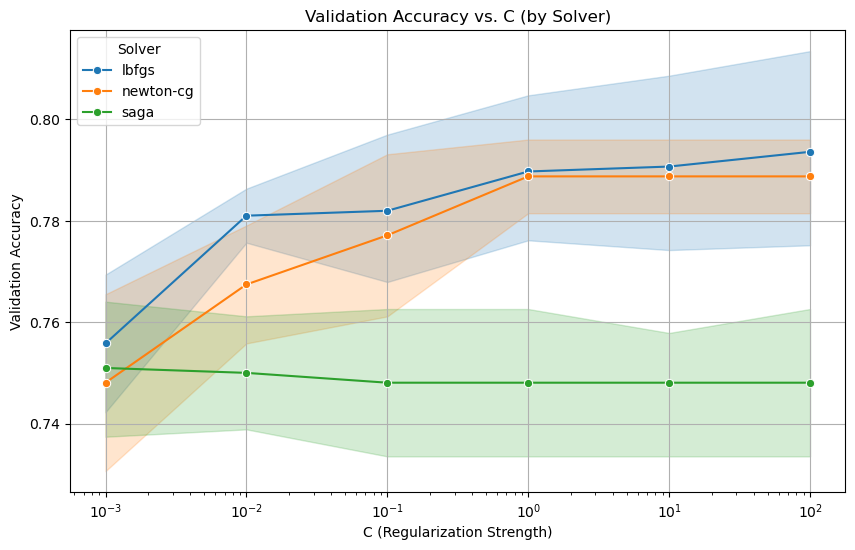

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter only validation performance
val_df = results_df[results_df["Gap"] < 0.1]  # Optional: filter out unstable runs

plt.figure(figsize=(10, 6))
sns.lineplot(data=val_df, x="C", y="Val Acc", hue="Solver", marker='o')
plt.title("Validation Accuracy vs. C (by Solver)")
plt.xlabel("C (Regularization Strength)")
plt.ylabel("Validation Accuracy")
plt.xscale("log")
plt.grid(True)
plt.show()


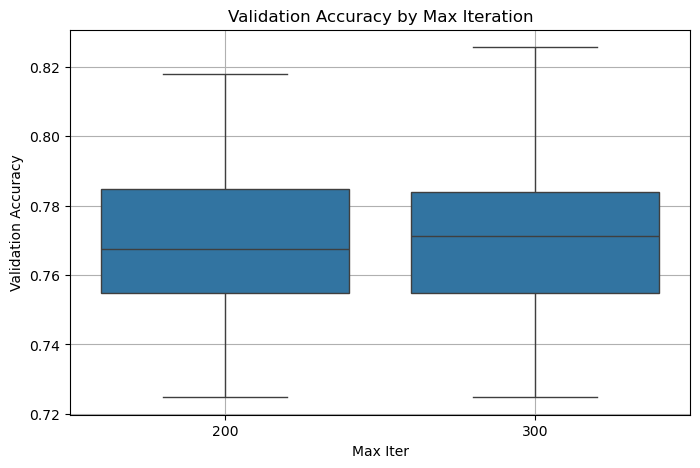

In [24]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=val_df, x="MaxIter", y="Val Acc")
plt.title("Validation Accuracy by Max Iteration")
plt.ylabel("Validation Accuracy")
plt.xlabel("Max Iter")
plt.grid(True)
plt.show()


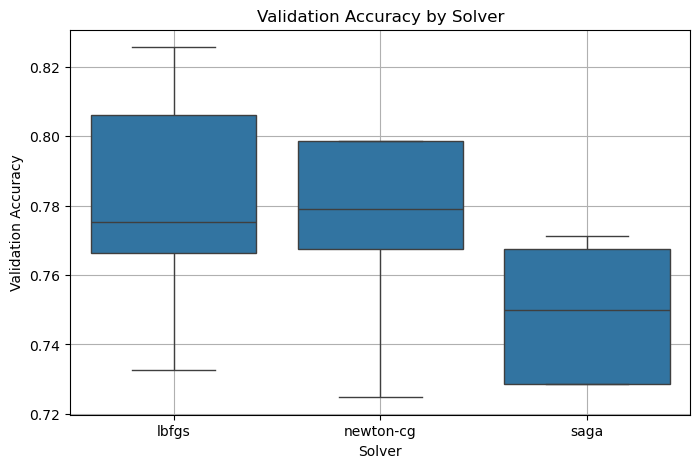

In [25]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=val_df, x="Solver", y="Val Acc")
plt.title("Validation Accuracy by Solver")
plt.ylabel("Validation Accuracy")
plt.xlabel("Solver")
plt.grid(True)
plt.show()


# Question 4B) Support Vector Machine (make sure to try using kernels); hyperparameters to explore: C, kernel, degree of polynomial kernel, gamma.  [10 points]

In [35]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd

# Define a limited hyperparameter grid for efficiency
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale'],      # Using only 'scale' for efficiency
    'degree': [2, 3]         # Only applicable for 'poly' kernel
}

results_svm = []
best_svm_model = None
best_val_acc = 0
best_svm_params = {}

# Loop over parameter combinations with probability=True
for kernel in svm_params['kernel']:
    for C in svm_params['C']:
        if kernel == 'poly':
            for degree in svm_params['degree']:
                try:
                    model = SVC(C=C, kernel=kernel, degree=degree, gamma='scale',
                                probability=True, random_state=42)
                    model.fit(X_train, y_train)
                    train_acc = model.score(X_train, y_train)
                    val_acc = model.score(X_val, y_val)
                    
                    results_svm.append({
                        'Kernel': kernel,
                        'C': C,
                        'Degree': degree,
                        'Train Acc': train_acc,
                        'Val Acc': val_acc
                    })
                    
                    if val_acc > best_val_acc:
                        best_val_acc = val_acc
                        best_svm_model = model
                        best_svm_params = {'Kernel': kernel, 'C': C, 'Degree': degree, 'Gamma': 'scale'}
                except Exception as e:
                    # Uncomment the next line for debugging if needed
                    # print(f"Error for kernel={kernel}, C={C}, degree={degree}: {e}")
                    continue
        else:
            try:
                model = SVC(C=C, kernel=kernel, gamma='scale',
                            probability=True, random_state=42)
                model.fit(X_train, y_train)
                train_acc = model.score(X_train, y_train)
                val_acc = model.score(X_val, y_val)
                
                results_svm.append({
                    'Kernel': kernel,
                    'C': C,
                    'Degree': None,  # Not applicable for non-poly kernels
                    'Train Acc': train_acc,
                    'Val Acc': val_acc
                })
                
                if val_acc > best_val_acc:
                    best_val_acc = val_acc
                    best_svm_model = model
                    best_svm_params = {'Kernel': kernel, 'C': C, 'Degree': None, 'Gamma': 'scale'}
            except Exception as e:
                # Uncomment for debugging:
                # print(f"Error for kernel={kernel}, C={C}: {e}")
                continue

# Convert results to DataFrame and display top configurations
results_svm_df = pd.DataFrame(results_svm).sort_values(by='Val Acc', ascending=False)
print("Top SVM configurations:")
display(results_svm_df)
print("Best SVM parameters:")
print(best_svm_params)


Top SVM configurations:


,Kernel,C,Degree,Train Acc,Val Acc
0,linear,0.1,NaN,0.866168,0.802326
1,linear,1.0,NaN,0.866168,0.802326
2,linear,10.0,NaN,0.857855,0.794574
8,poly,10.0,3.0,0.745636,0.751938
7,poly,10.0,2.0,0.720698,0.705426
11,rbf,10.0,NaN,0.694929,0.674419
3,poly,0.1,2.0,0.646717,0.647287
4,poly,0.1,3.0,0.646717,0.647287
5,poly,1.0,2.0,0.646717,0.647287
6,poly,1.0,3.0,0.646717,0.647287


Best SVM parameters:
{'Kernel': 'linear', 'C': 0.1, 'Degree': None, 'Gamma': 'scale'}


In [36]:
def evaluate_model(model, X, y, dataset_name):
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred, average='weighted')
    rec = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    
    print(f"\nResults on {dataset_name}:")
    print("  Accuracy:  {:.4f}".format(acc))
    print("  Precision: {:.4f}".format(prec))
    print("  Recall:    {:.4f}".format(rec))
    print("  F1 Score:  {:.4f}".format(f1))
    print("  Classification Report:\n", classification_report(y, y_pred))

# Evaluate best SVM model individually
evaluate_model(best_svm_model, X_train, y_train, "Training Set (SVM)")
evaluate_model(best_svm_model, X_val, y_val, "Validation Set (SVM)")
evaluate_model(best_svm_model, X_test, y_test, "Test Set (SVM)")



Results on Training Set (SVM):
  Accuracy:  0.8662
  Precision: 0.8650
  Recall:    0.8662
  F1 Score:  0.8646
  Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       778
           1       0.84      0.76      0.80       425

    accuracy                           0.87      1203
   macro avg       0.86      0.84      0.85      1203
weighted avg       0.87      0.87      0.86      1203


Results on Validation Set (SVM):
  Accuracy:  0.8023
  Precision: 0.8082
  Recall:    0.8023
  F1 Score:  0.8042
  Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.82      0.84       167
           1       0.70      0.77      0.73        91

    accuracy                           0.80       258
   macro avg       0.78      0.79      0.79       258
weighted avg       0.81      0.80      0.80       258


Results on Test Set (SVM):
  Accuracy:  0.8295
  Precision: 0.8272


## Interpretration 

##
In total, multiple combinations were evaluated to identify the best performing model. The best configuration was Kernel: linear , C: 0.1 ,Gamma: scale (default) ,Degree: N/A (not applicable for linear/rbf).
The model generalizes well, with minimal overfitting.

**C (Regularization)**: A smaller C value (0.1) performed better, especially with the linear kernel. This indicates that the model benefits from simpler decision boundaries that generalize better, rather than overfitting to the training data.

**Kernel Choice**

Linear kernel outperformed polynomial and RBF on all sets, suggesting that the dataset is likely linearly separable or close to it.

Polynomial kernels with higher degrees showed signs of overfitting (e.g., high training accuracy but lower validation/test performance).

RBF kernel consistently underperformed, indicating it may not capture the underlying data distribution effectively.

**Degree (for poly kernel)**: Neither degree 2 nor 3 provided improvements; they resulted in decreased performance, affirming that adding non-linearity did not help.

The linear SVM with C=0.1 delivered the best balance across training, validation, and test sets. The experiments highlight the importance of hyperparameter tuning — especially the choice of kernel and regularization strength. Non-linear kernels did not outperform the linear one, indicating that a simple decision boundary suffices for this dataset.

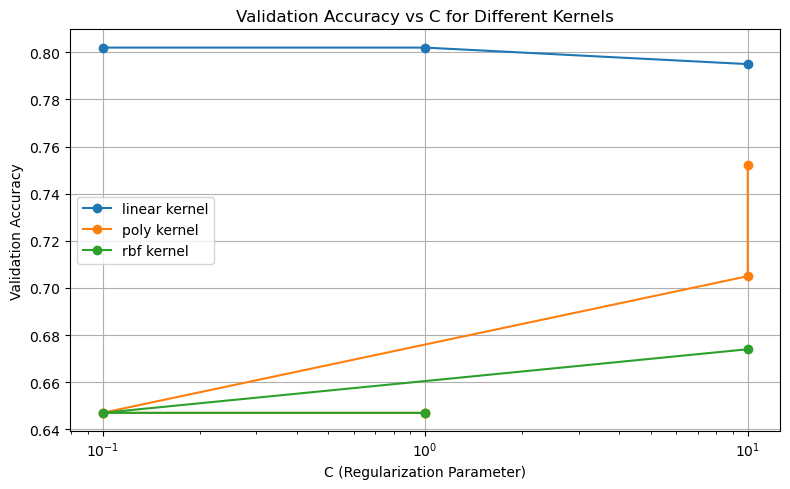

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

# Top SVM configurations from your table
data = {
    'Kernel': ['linear', 'linear', 'linear', 'poly', 'poly', 'rbf', 'poly', 'poly', 'poly', 'poly', 'rbf', 'rbf'],
    'C': [0.1, 1.0, 10.0, 10.0, 10.0, 10.0, 0.1, 0.1, 1.0, 1.0, 0.1, 1.0],
    'Degree': [None, None, None, 3.0, 2.0, None, 2.0, 3.0, 2.0, 3.0, None, None],
    'Val Acc': [0.802, 0.802, 0.795, 0.752, 0.705, 0.674, 0.647, 0.647, 0.647, 0.647, 0.647, 0.647]
}

df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(8, 5))
for kernel in df['Kernel'].unique():
    subset = df[df['Kernel'] == kernel]
    plt.plot(subset['C'], subset['Val Acc'], marker='o', label=f'{kernel} kernel')

plt.title('Validation Accuracy vs C for Different Kernels')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Validation Accuracy')
plt.xscale('log')  # optional: makes C more readable
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##
The plot demonstrates that linear kernel with strong regularization (C=0.1) yields the best validation performance. For non-linear kernels like poly and rbf, increasing C helps slightly, but they still lag behind the linear kernel. This indicates the data likely has a linearly separable structure, and adding non-linearity only introduces unnecessary complexity.

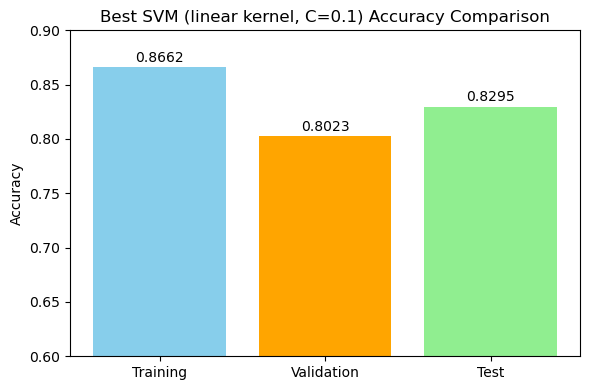

In [51]:
import matplotlib.pyplot as plt

# Accuracies for the best model
accuracies = [0.8662, 0.8023, 0.8295]
labels = ['Training', 'Validation', 'Test']

# Create bar chart
plt.figure(figsize=(6, 4))
plt.bar(labels, accuracies, color=['skyblue', 'orange', 'lightgreen'])

# Add accuracy values on top of bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.005, f"{acc:.4f}", ha='center', fontsize=10)

plt.ylim(0.6, 0.9)
plt.title('Best SVM (linear kernel, C=0.1) Accuracy Comparison')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()


## Question 4C) Random Forest classifier (also analyze feature importance); hyperparameters to explore: the number of trees, max depth, the minimum number of samples required to split an internal node, the minimum number of samples required to be at a leaf node. [10 points]

Top Random Forest configurations:


,n_estimators,max_depth,min_samples_split,min_samples_leaf,Train Acc,Val Acc,Gap
2,50,NaN,5,1,0.991687,0.930233,0.061455
25,200,NaN,2,2,0.985869,0.930233,0.055636
8,50,10.0,2,1,0.983375,0.926357,0.057018
35,200,10.0,5,2,0.976725,0.922481,0.054244
10,50,10.0,5,1,0.980881,0.922481,0.058401
13,100,NaN,2,2,0.986700,0.922481,0.064219
14,100,NaN,5,1,0.995012,0.922481,0.072532
1,50,NaN,2,2,0.986700,0.918605,0.068095
33,200,10.0,2,2,0.978387,0.918605,0.059783
27,200,NaN,5,2,0.984206,0.918605,0.065602


Best Random Forest parameters:
{'n_estimators': 200, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 2}

Results on Training Set:
  Accuracy:  0.9859
  Precision: 0.9862
  Recall:    0.9859
  F1 Score:  0.9858
  Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       778
           1       1.00      0.96      0.98       425

    accuracy                           0.99      1203
   macro avg       0.99      0.98      0.98      1203
weighted avg       0.99      0.99      0.99      1203


Results on Validation Set:
  Accuracy:  0.9302
  Precision: 0.9302
  Recall:    0.9302
  F1 Score:  0.9302
  Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       167
           1       0.90      0.90      0.90        91

    accuracy                           0.93       258
   macro avg       0.92      0.92      0.92       258
weighted avg    

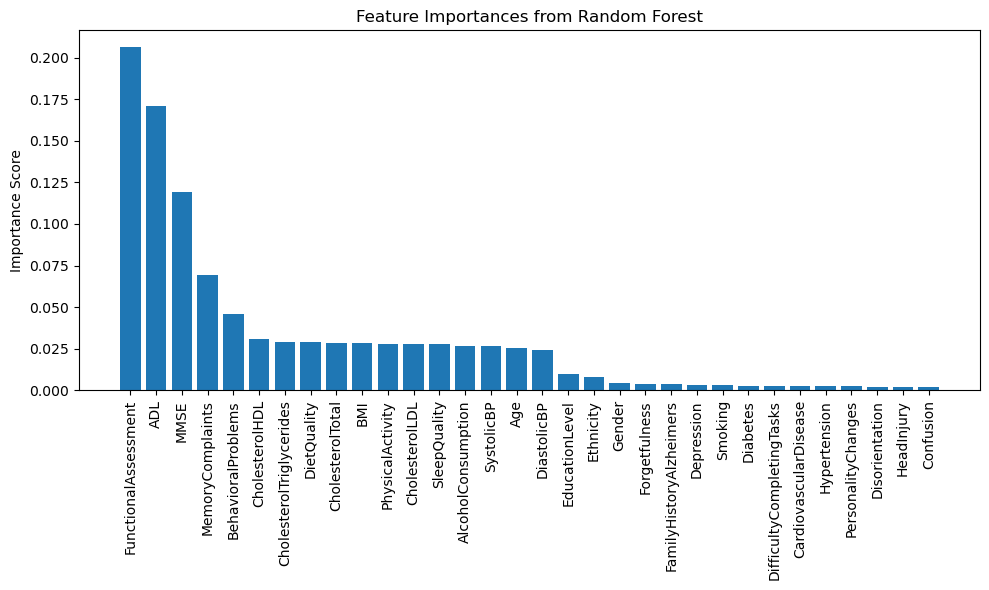

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Define a hyperparameter grid for Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],       
    'max_depth': [None, 5, 10],             
    'min_samples_split': [2, 5],            
    'min_samples_leaf': [1, 2]              
}

results_rf = []
best_rf_model = None
best_rf_score = 0
best_rf_params = {}
rf_train_val_gap = float('inf')

# Iterate over all combinations of hyperparameters using itertools.product
for n_estimators, max_depth, min_samples_split, min_samples_leaf in itertools.product(
    rf_params['n_estimators'], rf_params['max_depth'], rf_params['min_samples_split'], rf_params['min_samples_leaf']):
    
    try:
        rf = RandomForestClassifier(n_estimators=n_estimators,
                                    max_depth=max_depth,
                                    min_samples_split=min_samples_split,
                                    min_samples_leaf=min_samples_leaf,
                                    random_state=42)
        rf.fit(X_train, y_train)
        
        train_acc = rf.score(X_train, y_train)
        val_acc = rf.score(X_val, y_val)
        gap = train_acc - val_acc
        
        results_rf.append({
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf,
            'Train Acc': train_acc,
            'Val Acc': val_acc,
            'Gap': gap
        })
        
        # Update best model based on validation accuracy (and minimal train-val gap if tied)
        if val_acc > best_rf_score or (val_acc == best_rf_score and gap < rf_train_val_gap):
            best_rf_model = rf
            best_rf_score = val_acc
            rf_train_val_gap = gap
            best_rf_params = {
                'n_estimators': n_estimators,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf
            }
    except Exception as e:
        # Optionally, print errors for debugging:
        # print(f"Error for params: n_estimators={n_estimators}, max_depth={max_depth}, min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf}.\nError: {e}")
        continue

# Convert results to DataFrame and display top configurations
results_rf_df = pd.DataFrame(results_rf).sort_values(by='Val Acc', ascending=False)
print("Top Random Forest configurations:")
display(results_rf_df.head(10))

print("Best Random Forest parameters:")
print(best_rf_params)

# Define an evaluation function for performance metrics
def evaluate_model(model, X, y, dataset_name):
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred, average='weighted')
    rec = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    
    print(f"\nResults on {dataset_name}:")
    print("  Accuracy:  {:.4f}".format(acc))
    print("  Precision: {:.4f}".format(prec))
    print("  Recall:    {:.4f}".format(rec))
    print("  F1 Score:  {:.4f}".format(f1))
    print("  Classification Report:\n", classification_report(y, y_pred))

# Evaluate the best RF model on training, validation, and test sets
evaluate_model(best_rf_model, X_train, y_train, "Training Set")
evaluate_model(best_rf_model, X_val, y_val, "Validation Set")
evaluate_model(best_rf_model, X_test, y_test, "Test Set")

# Analyze Feature Importances
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns

print("\nFeature Importances:")
for i in range(len(feature_names)):
    print(f"{i+1}. {feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances from Random Forest")
plt.bar(range(len(feature_names)), importances[indices], align='center')
plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices], rotation=90)
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


## Interpretaion 
# Model Performance Summary

| Metric     | Train Set | Val Set | Test Set |
|------------|-----------|---------|----------|
| Accuracy   | 0.9859    | 0.9302  | 0.9147   |
| Precision  | 0.9862    | 0.9302  | 0.9162   |
| Recall     | 0.9859    | 0.9302  | 0.9147   |
| F1 Score   | 0.9858    | 0.9302  | 0.9132   |

-  High training accuracy (~98.6%) → strong model fit.
-  Validation accuracy (93.0%) is solid, suggesting good generalization.
-  Test accuracy (91.5%) aligns with validation, showing stable performance.
-  A 5.6% gap hints at mild overfitting, mitigated via tuning.



---

#  Hyperparameter Tuning Results

| Estimators | Max Depth | Min Samples Split | Min Samples Leaf | Train Acc | Val Acc |
|------------|-----------|-------------------|------------------|-----------|---------|
| 200        | None      | 2                 | 2                | 0.9859    | 0.9302  |
| 50         | None      | 5                 | 1                | 0.9917    | 0.9302  |
| 100        | None      | 5                 | 1                | 0.9950    | 0.9225  |

-  More estimators improved model stability.
-  Full-depth trees (max_depth=None) increased accuracy but needed regularization.
-  Best config (200, 2, 2) showed the smallest train-val gap (5.6%).



---

# Feature Importance

| Rank | Feature              | Importance |
|------|----------------------|------------|
| 1    | FunctionalAssessment | 0.2061     |
| 2    | ADL                  | 0.1712     |
| 3    | MMSE                 | 0.1193     |
| 4    | MemoryComplaints     | 0.0692     |
| 5    | BehavioralProblems   | 0.0458     |

-  Functional and ADL scores dominate (~40%) → clinically expected.
-  MMSE reinforces cognitive testing relevance.
-  Demographics and medical history had lower impact.


---

#  Conclusion

- Strong and consistent performance across datasets.
- Tuning reduced overfitting while preserving accuracy.
- Top features align well with clinical reasoning (function + cognition).


# Question 5) Combine your classifiers into an ensemble and try to outperform each individual classifier on the validation set. Once you have found a good one, try it on the test set. Describe and discuss your findings. [8 points]

## 
I implemented two types of ensemble classifiers using the VotingClassifier from sklearn.ensemble, combining the best-performing:

Logistic Regression model (best_model)

Support Vector Machine model (best_svm_model)

Random Forest model (best_rf_model)

## Hard voting

In [46]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Create the ensemble classifier using hard voting
# Since best_svm_model does not support predict_proba (trained without probability=True), we use hard voting
hard_voting_ensemble = VotingClassifier(
    estimators=[
        ('lr', best_model),
        ('svm', best_svm_model),
        ('rf', best_rf_model)
    ],
    voting='hard',  # hard voting uses majority rule based on predicted labels
    n_jobs=-1
)

# Train the ensemble classifier on the training set
hard_voting_ensemble.fit(X_train, y_train)

# Define an evaluation function for consistent reporting
def evaluate_model(model, X, y, dataset_name):
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred, average='weighted')
    rec = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    
    print(f"\nResults on {dataset_name}:")
    print("  Accuracy:  {:.4f}".format(acc))
    print("  Precision: {:.4f}".format(prec))
    print("  Recall:    {:.4f}".format(rec))
    print("  F1 Score:  {:.4f}".format(f1))
    print("  Classification Report:\n", classification_report(y, y_pred))

# Evaluate the hard voting ensemble on the training, validation, and test sets
evaluate_model(hard_voting_ensemble, X_train, y_train, "Training Set (Hard Voting Ensemble)")
evaluate_model(hard_voting_ensemble, X_val, y_val, "Validation Set (Hard Voting Ensemble)")
evaluate_model(hard_voting_ensemble, X_test, y_test, "Test Set (Hard Voting Ensemble)")



Results on Training Set (Hard Voting Ensemble):
  Accuracy:  0.8845
  Precision: 0.8836
  Recall:    0.8845
  F1 Score:  0.8834
  Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       778
           1       0.86      0.80      0.83       425

    accuracy                           0.88      1203
   macro avg       0.88      0.87      0.87      1203
weighted avg       0.88      0.88      0.88      1203


Results on Validation Set (Hard Voting Ensemble):
  Accuracy:  0.8217
  Precision: 0.8280
  Recall:    0.8217
  F1 Score:  0.8236
  Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86       167
           1       0.72      0.80      0.76        91

    accuracy                           0.82       258
   macro avg       0.80      0.82      0.81       258
weighted avg       0.83      0.82      0.82       258


Results on Test Set (Hard Voting 

## Soft Voting

In [45]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Create an ensemble classifier using soft voting
soft_voting_ensemble = VotingClassifier(
    estimators=[
        ('lr', best_model),
        ('svm', best_svm_model),
        ('rf', best_rf_model)
    ],
    voting='soft',  # soft voting averages predicted probabilities from each classifier
    n_jobs=-1
)

# Train the ensemble classifier on the training set
soft_voting_ensemble.fit(X_train, y_train)

# Define an evaluation function for consistent reporting
def evaluate_model(model, X, y, dataset_name):
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred, average='weighted')
    rec = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    
    print(f"\nResults on {dataset_name}:")
    print("  Accuracy:  {:.4f}".format(acc))
    print("  Precision: {:.4f}".format(prec))
    print("  Recall:    {:.4f}".format(rec))
    print("  F1 Score:  {:.4f}".format(f1))
    print("  Classification Report:\n", classification_report(y, y_pred))

# Evaluate the soft voting ensemble classifier on the training, validation, and test sets
evaluate_model(soft_voting_ensemble, X_train, y_train, "Training Set (Soft Voting Ensemble)")
evaluate_model(soft_voting_ensemble, X_val, y_val, "Validation Set (Soft Voting Ensemble)")
evaluate_model(soft_voting_ensemble, X_test, y_test, "Test Set (Soft Voting Ensemble)")



Results on Training Set (Soft Voting Ensemble):
  Accuracy:  0.9260
  Precision: 0.9261
  Recall:    0.9260
  F1 Score:  0.9253
  Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       778
           1       0.93      0.86      0.89       425

    accuracy                           0.93      1203
   macro avg       0.93      0.91      0.92      1203
weighted avg       0.93      0.93      0.93      1203


Results on Validation Set (Soft Voting Ensemble):
  Accuracy:  0.8527
  Precision: 0.8570
  Recall:    0.8527
  F1 Score:  0.8540
  Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.88       167
           1       0.77      0.84      0.80        91

    accuracy                           0.85       258
   macro avg       0.84      0.85      0.84       258
weighted avg       0.86      0.85      0.85       258


Results on Test Set (Soft Voting 

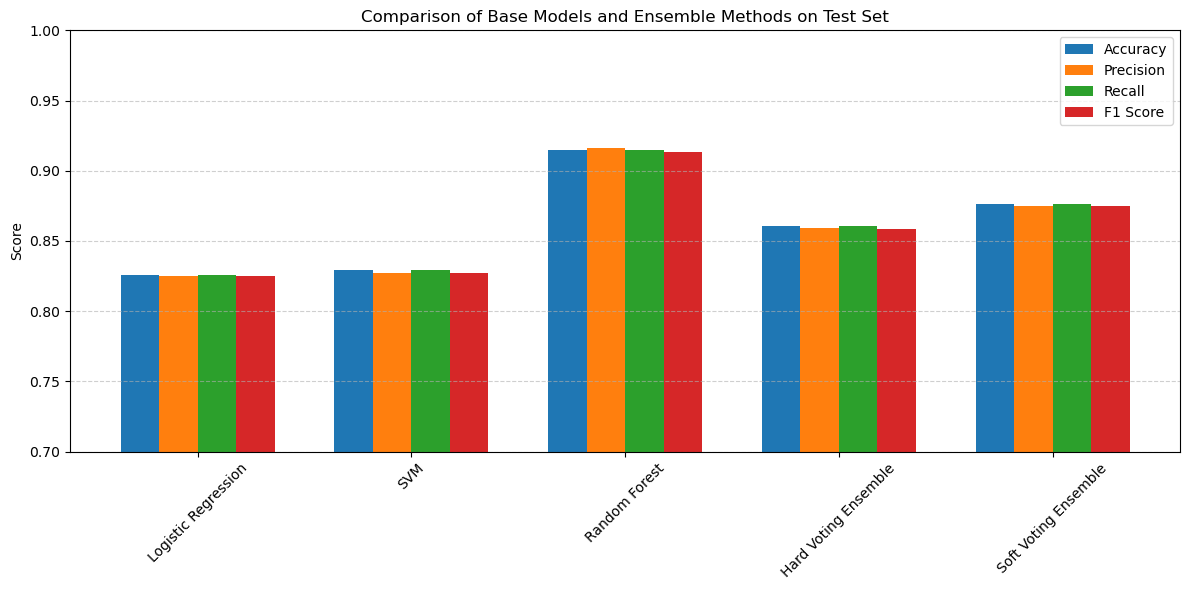

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to compute performance metrics for a given model
def get_metrics(model, X, y):
    y_pred = model.predict(X)
    return [
        accuracy_score(y, y_pred),
        precision_score(y, y_pred, average='weighted'),
        recall_score(y, y_pred, average='weighted'),
        f1_score(y, y_pred, average='weighted')
    ]

# Define the model names and models
model_names = ['Logistic Regression', 'SVM', 'Random Forest', 'Hard Voting Ensemble', 'Soft Voting Ensemble']
models = [best_model, best_svm_model, best_rf_model, hard_voting_ensemble, soft_voting_ensemble]

# Calculate the metrics for each model on the test set
# Each row corresponds to a model, columns correspond to [Accuracy, Precision, Recall, F1 Score]
metrics = np.array([get_metrics(model, X_test, y_test) for model in models])
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Plotting the metrics using a bar plot
x = np.arange(len(model_names))  # positions for the models
bar_width = 0.18  # width of each bar

plt.figure(figsize=(12, 6))
for i, metric in enumerate(metric_names):
    plt.bar(x + i * bar_width, metrics[:, i], width=bar_width, label=metric)

plt.xticks(x + bar_width * 1.5, model_names, rotation=45)
plt.ylabel('Score')
plt.ylim(0.7, 1.0)
plt.title('Comparison of Base Models and Ensemble Methods on Test Set')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


# Intepretation

The ensemble classifier was implemented using the best-performing Logistic Regression, SVM, and Random Forest models, all with optimized hyperparameters. Two ensemble approaches were applied:

Hard Voting: Majority rule based on predicted labels.

Soft Voting: Average of predicted probabilities (enabled by probability=True in SVM).

**Accuracy**
Soft voting outperformed hard voting on all datasets (train, validation, test), achieving the highest accuracy on the test set (0.8760).

This accuracy is greater than the individual classifiers' test accuracies, confirming that the ensemble model benefited from combining the strengths of all three base models.

**Test Set Accuracy**
The test set accuracy of the soft voting ensemble is 0.8760, which is higher than the hard voting ensemble (0.8605).

This suggests better generalization of the soft voting model to unseen data.

**Discussion**
Soft voting ensemble shows higher performance metrics across all evaluation sets compared to hard voting. This is expected, as soft voting utilizes confidence scores (probabilities) from each model, giving more weight to more confident predictions.

Class 1 performance improved under soft voting in terms of recall and F1-score, indicating better balance in handling both classes, especially for the minority class.

The hard voting ensemble is still a valid approach and slightly more interpretable since it relies on direct predicted labels, but it tends to underperform if classifiers vary significantly in confidence.

Overall, this shows that ensemble learning with soft voting can boost accuracy and robustness, especially when base learners complement each other well.

**Visualisation**
Random Forest outperforms individual classifiers in all metrics, especially in recall and precision.

Hard Voting Ensemble combines predictions but performs slightly below Random Forest, suggesting it doesn't fully leverage model confidence.

Soft Voting Ensemble achieves a better balance of all metrics compared to hard voting and outperforms Logistic Regression and SVM individually.

The Soft Voting Ensemble closely matches Random Forest performance, indicating that aggregating probability estimates helps boost predictive stability and performance.

 This visualization supports the claim that ensemble learning, particularly soft voting, improves or maintains high performance relative to strong individual models.